In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/CSC522_Final_Project'

/content/drive/MyDrive/CSC522_Final_Project


In [ ]:
!ls

archive.zip	     enron_spam_data.gsheet  spam_ham_dataset.csv
enron_spam_data.csv  enron_spam_data.zip     spam_ham_dataset.gsheet


In [ ]:
#Import all libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.tokenize import word_tokenize

import pickle
import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Reading dataset
df = pd.read_csv("enron_spam_data.csv")

In [ ]:
print(df.head(10))

   Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   
5           5      mcmullen gas for 11 / 99   
6           6         meter 1517 - jan 1999   
7           7           duns number changes   
8           8                    king ranch   
9           9        re : entex transistion   

                                             Message Spam/Ham        Date  
0                                                NaN      ham  1999-12-10  
1  gary , production from the high island larger ...      ham  1999-12-13  
2             - calpine daily gas nomination 1 . doc      ham  1999-12-14  
3  fyi - see note below - already done .\nstella\...      ham  1999-12-14  
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      ham  1999-12-14  
5  jackie ,\nsince the inl

In [ ]:
label= df["Spam/Ham"].value_counts()
print(label)

spam    17171
ham     16545
Name: Spam/Ham, dtype: int64


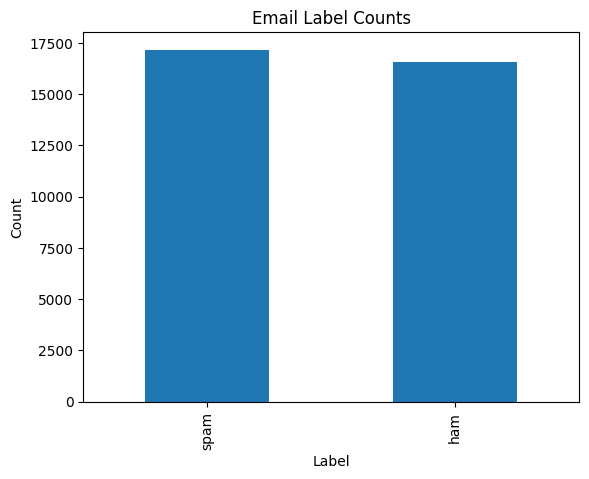

In [ ]:
#plot label counts
label.plot.bar()
plt.title("Email Label Counts")
plt.xlabel("Label")
plt.ylabel("Count")
#show the number over the bar
plt.show()

In [ ]:
# convert all text to lowwer case
df['Subject'] = df['Subject'].str.lower()
df['Message'] = df['Message'].str.lower()


In [ ]:
df.head(5)

Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   

                                             Message Spam/Ham        Date  
0                                                NaN      ham  1999-12-10  
1  gary , production from the high island larger ...      ham  1999-12-13  
2             - calpine daily gas nomination 1 . doc      ham  1999-12-14  
3  fyi - see note below - already done .\nstella\...      ham  1999-12-14  
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      ham  1999-12-14

In [ ]:
#preprocessing to remove punctuations and words like re : from subject and message
df['Subject'].fillna('', inplace=True)
df['Message'].fillna('', inplace=True)
df['Subject'] = df['Subject'].str.replace('[^\w\s]', '', regex=True)
df['Message'] = df['Message'].str.replace('[^\w\s]', '', regex=True)

In [ ]:
# Combining 'Subject' and 'Message' into a single column
df['text'] = df['Subject'] + ' ' + df['Message']

In [ ]:
# Assuming df is your DataFrame containing the 'text' column
# Tokenize the 'text' column and create a new column 'tokenized_text' to store the tokenized data
df['tokenized_text'] = df['text'].apply(lambda x: word_tokenize(x))
df['tokenized_subject'] = df['Subject'].apply(lambda x: word_tokenize(x))
df['tokenized_message'] = df['Message'].apply(lambda x: word_tokenize(x))

In [ ]:
def make_wordcloud(text , stopword):
    word_cloud = WordCloud(
            width=900,
            height=600,
            random_state=1,
            background_color="black",
            colormap="Pastel1",
            collocations=False,
            stopwords=stopword,
            ).generate(text)
    return word_cloud

In [ ]:
spam_subject_corpus = []
spam_message_corpus = []
ham_subject_corpus = []
ham_message_corpus = []

In [ ]:
spam_subject_corpus = df[df['Spam/Ham']=='spam']['tokenized_subject'].to_list()
#print(spam_subject_corpus)
spam_subject_corpus = [item for sublist in spam_subject_corpus for item in sublist]
#print(spam_subject_corpus[:20])

[['dobmeos', 'with', 'hgh', 'my', 'energy', 'level', 'has', 'gone', 'up', 'stukm'], ['your', 'prescription', 'is', 'ready', 'oxwq', 's', 'f', 'e'], ['get', 'that', 'new', 'car', '8434'], ['await', 'your', 'response'], ['coca', 'cola', 'mbna', 'america', 'nascar', 'partner', 'with', 'otcbb', 'imts'], ['emerging', 'small', 'cap'], ['re', 'patchs', 'work', 'better', 'then', 'pillz'], ['paliourg', 'udtih', '7', 'wcwknoanopkt'], ['real', 'products', 'for', 'real', 'people', 'b'], ['pe', 'nis', 's', 'ize', 'mat', 'ters', 'yhvqbvdboevkcd'], ['re', 'rdd', 'the', 'auxiliary', 'iturean'], ['stacey', 'automated', 'system', 'generating', '8', 'k', 'per', 'week', 'parallelogram'], ['enjoy', 'it'], ['re', '8', 'dear', 'friend'], ['not', 'p', 'leasing', 'your', 'wife', 'anymore', 'try', 'via', 'gra'], ['re', 'kqttnvk', 'to', 'bear', 'their'], ['buy', 'cheap', 'prescription', 'drugs', 'online', 'dd'], ['cut', 'your', 'medic', 'l', 'costs', 'by', '65', 'on', 'brand', 'name', 'medic', 'tions'], ['smoke'

In [ ]:
spam_message_corpus = df[df['Spam/Ham']=='spam']['tokenized_message'].to_list()
print(spam_message_corpus[:5])
spam_message_corpus = [item for sublist in spam_message_corpus for item in sublist]
print(spam_message_corpus[:20])

[['introducing', 'doctor', 'formulated', 'hgh', 'human', 'growth', 'hormone', 'also', 'called', 'hgh', 'is', 'referred', 'to', 'in', 'medical', 'science', 'as', 'the', 'master', 'hormone', 'it', 'is', 'very', 'plentiful', 'when', 'we', 'are', 'young', 'but', 'near', 'the', 'age', 'of', 'twenty', 'one', 'our', 'bodies', 'begin', 'to', 'produce', 'less', 'of', 'it', 'by', 'the', 'time', 'we', 'are', 'forty', 'nearly', 'everyone', 'is', 'deficient', 'in', 'hgh', 'and', 'at', 'eighty', 'our', 'production', 'has', 'normally', 'diminished', 'at', 'least', '90', '95', 'advantages', 'of', 'hgh', 'increased', 'muscle', 'strength', 'loss', 'in', 'body', 'fat', 'increased', 'bone', 'density', 'lower', 'blood', 'pressure', 'quickens', 'wound', 'healing', 'reduces', 'cellulite', 'improved', 'vision', 'wrinkle', 'disappearance', 'increased', 'skin', 'thickness', 'texture', 'increased', 'energy', 'levels', 'improved', 'sleep', 'and', 'emotional', 'stability', 'improved', 'memory', 'and', 'mental', 'a

In [ ]:
ham_subject_corpus = df[df['Spam/Ham']=='ham']['tokenized_subject'].to_list()
print(ham_subject_corpus)
ham_subject_corpus = [item for sublist in ham_subject_corpus for item in sublist]
print(ham_subject_corpus[:20])

[['christmas', 'tree', 'farm', 'pictures'], ['vastar', 'resources', 'inc'], ['calpine', 'daily', 'gas', 'nomination'], ['re', 'issue'], ['meter', '7268', 'nov', 'allocation'], ['mcmullen', 'gas', 'for', '11', '99'], ['meter', '1517', 'jan', '1999'], ['duns', 'number', 'changes'], ['king', 'ranch'], ['re', 'entex', 'transistion'], ['entex', 'transistion'], ['lst', 'rev', 'dec', '1999', 'josey', 'ranch', 'nom'], ['2', 'nd', 'rev', 'dec', '1999', 'josey', 'ranch', 'nom'], ['unify', 'close', 'schedule'], ['meter', '1431', 'nov', '1999'], ['meter', '1431', 'nov', '1999'], ['y', '2', 'k', 'texas', 'log'], ['re', 'lyondell', 'citgo'], ['hpl', 'fuel', 'gas', 'buy', 'back', 'for', 'december', '1999'], ['ua', '4', 'meter', '1441', 'for', '11', '97', 'falfurrias'], ['ua', '4', 'for', 'meter', '8608', '6', '98', 'deal', '96731'], ['january', 'spot', 'tickets'], ['pennzenergy', 'property', 'details'], ['miscellaneous'], ['re', 'purge', 'of', 'old', 'contract', '_', 'event', '_', 'status'], ['out', 

In [ ]:
ham_message_corpus = df[df['Spam/Ham']=='ham']['tokenized_message'].to_list()
print(ham_message_corpus[:5])
ham_message_corpus = [item for sublist in ham_message_corpus for item in sublist]
print(ham_message_corpus[:20])

[[], ['gary', 'production', 'from', 'the', 'high', 'island', 'larger', 'block', 'a', '1', '2', 'commenced', 'on', 'saturday', 'at', '2', '00', 'p', 'm', 'at', 'about', '6', '500', 'gross', 'carlos', 'expects', 'between', '9', '500', 'and', '10', '000', 'gross', 'for', 'tomorrow', 'vastar', 'owns', '68', 'of', 'the', 'gross', 'production', 'george', 'x', '3', '6992', 'forwarded', 'by', 'george', 'weissman', 'hou', 'ect', 'on', '12', '13', '99', '10', '16', 'am', 'daren', 'j', 'farmer', '12', '10', '99', '10', '38', 'am', 'to', 'carlos', 'j', 'rodriguez', 'hou', 'ect', 'ect', 'cc', 'george', 'weissman', 'hou', 'ect', 'ect', 'melissa', 'graves', 'hou', 'ect', 'ect', 'subject', 'vastar', 'resources', 'inc', 'carlos', 'please', 'call', 'linda', 'and', 'get', 'everything', 'set', 'up', 'i', 'm', 'going', 'to', 'estimate', '4', '500', 'coming', 'up', 'tomorrow', 'with', 'a', '2', '000', 'increase', 'each', 'following', 'day', 'based', 'on', 'my', 'conversations', 'with', 'bill', 'fischer', 'a

In [ ]:
with open('spam_subject_corpus', 'wb') as f:
  pickle.dump(spam_subject_corpus, f)

with open('spam_message_corpus', 'wb') as f:
  pickle.dump(spam_message_corpus, f)

with open('ham_subject_corpus', 'wb') as f:
  pickle.dump(ham_subject_corpus, f)

with open('ham_subject_corpus', 'wb') as f:
  pickle.dump(ham_subject_corpus, f)

In [ ]:
#add any stop words we might see in the wordcloud
more_stopwords = {'re' , 's', 'fw', 'enron', 'subject', 'e', 'u'}
STOPWORDS = STOPWORDS.union(more_stopwords)

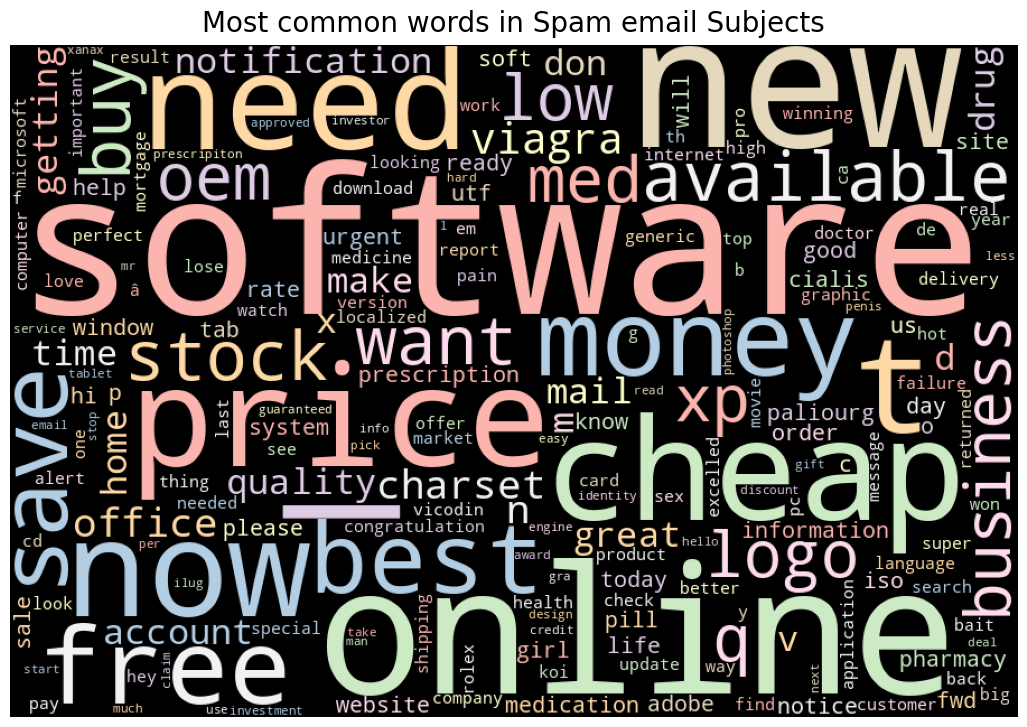

In [ ]:
spam_subject_wordcloud = make_wordcloud (" ".join(spam_subject_corpus) , STOPWORDS)
plt.figure(figsize=(13, 13))
plt.title("Most common words in Spam email Subjects", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.imshow(spam_subject_wordcloud)
plt.axis("off")
plt.show()

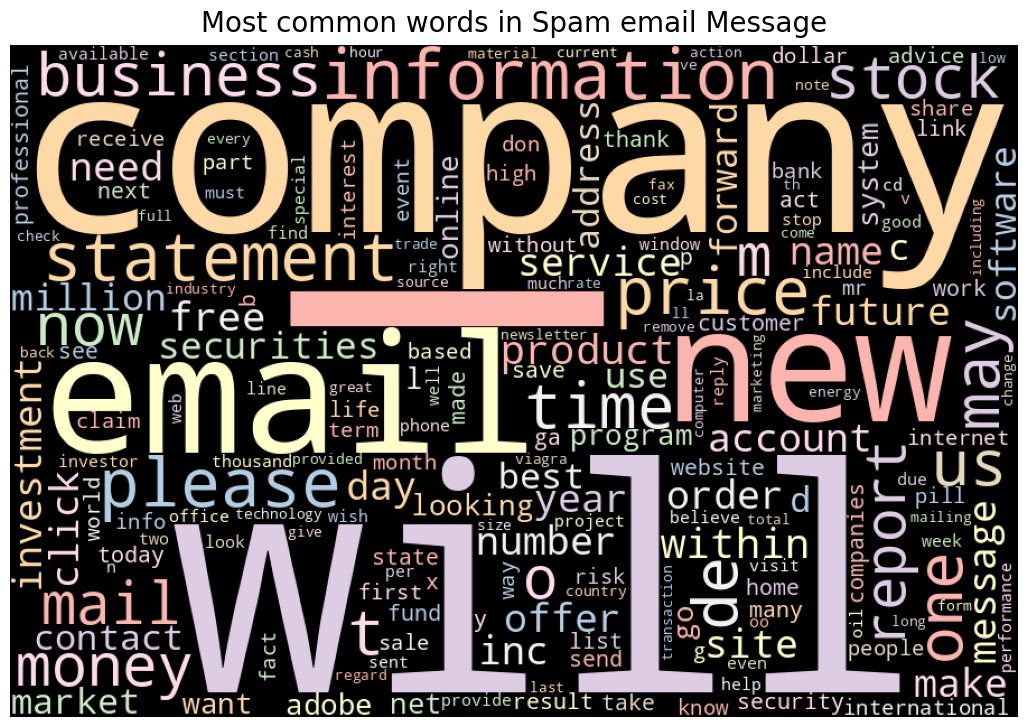

In [ ]:
spam_message_wordcloud = make_wordcloud (" ".join(spam_message_corpus) , STOPWORDS)
plt.figure(figsize=(13, 13))
plt.title("Most common words in Spam email Message", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.imshow(spam_message_wordcloud)
plt.axis("off")
plt.show()

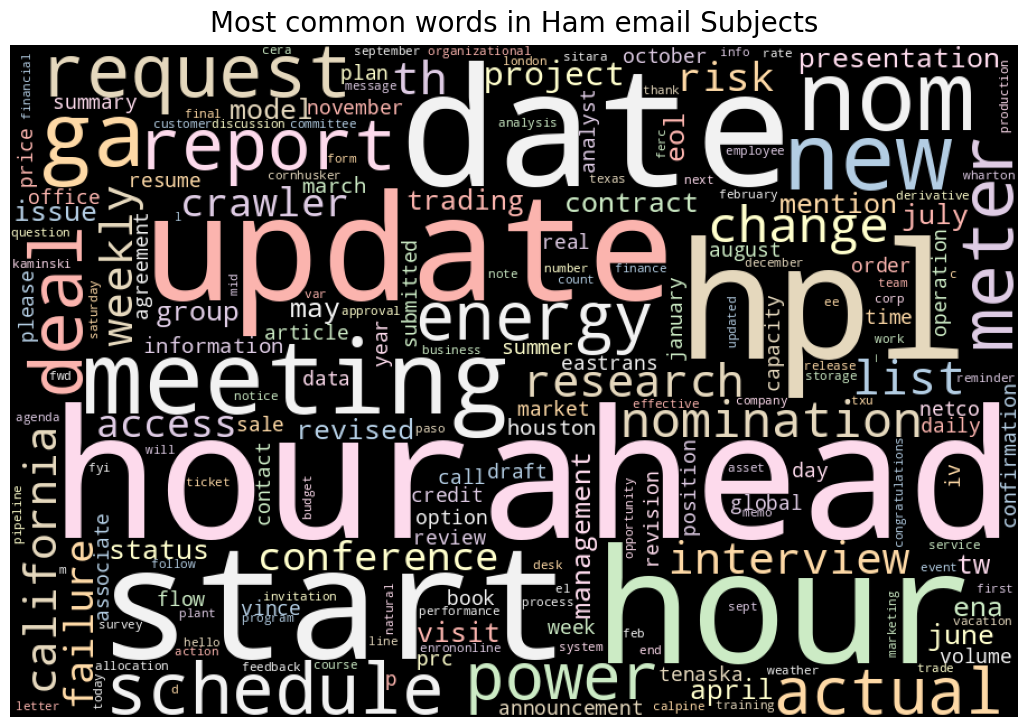

In [ ]:
ham_subject_wordcloud = make_wordcloud (" ".join(ham_subject_corpus) , STOPWORDS)
plt.figure(figsize=(13, 13))
plt.title("Most common words in Ham email Subjects", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.imshow(ham_subject_wordcloud)
plt.axis("off")
plt.show()

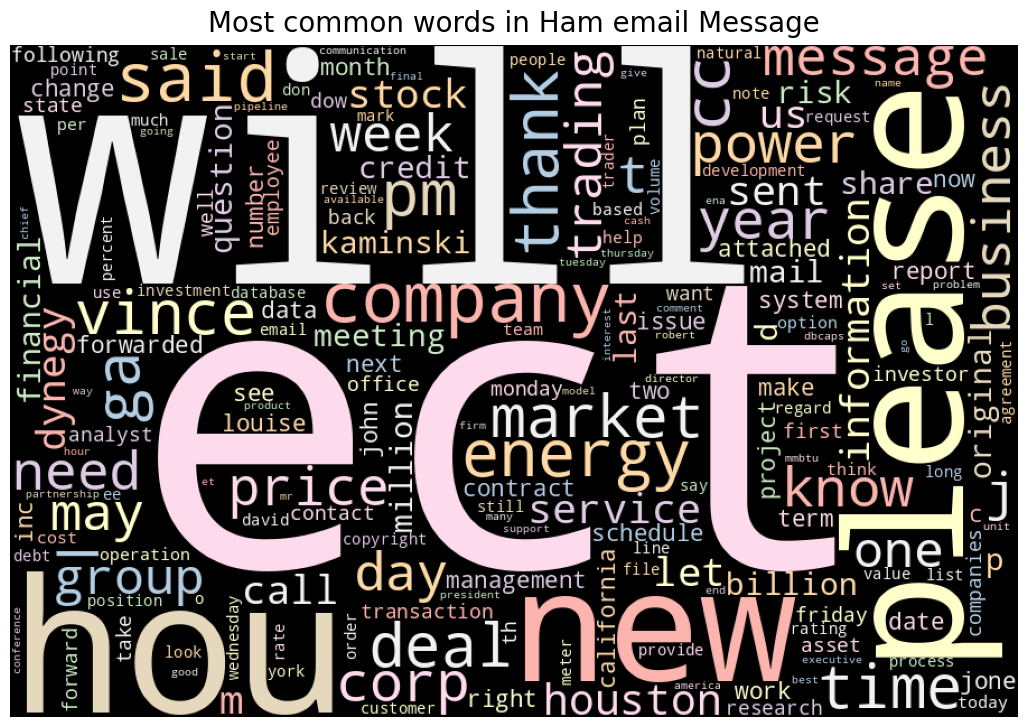

In [ ]:
ham_message_wordcloud = make_wordcloud (" ".join(ham_message_corpus) , STOPWORDS)
plt.figure(figsize=(13, 13))
plt.title("Most common words in Ham email Message", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.imshow(ham_message_wordcloud)
plt.axis("off")
plt.show()

In [ ]:
df.head(5)

Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1        vastar resources  inc    
2           2  calpine daily gas nomination   
3           3                     re  issue   
4           4     meter 7268 nov allocation   

                                             Message Spam/Ham        Date  \
0                                                         ham  1999-12-10   
1  gary  production from the high island larger b...      ham  1999-12-13   
2                calpine daily gas nomination 1  doc      ham  1999-12-14   
3  fyi  see note below  already done \nstella\n  ...      ham  1999-12-14   
4  fyi \n                      forwarded by lauri...      ham  1999-12-14   

                                                text  
0                      christmas tree farm pictures   
1  vastar resources  inc  gary  production from t...  
2  calpine daily gas nomination  calpine daily ga...  
3  re  issue fyi  see note below  already done \n...  
4  meter 7268 nov allocation fyi \n              ...

In [ ]:
# Create a TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=None)

In [ ]:
#Train and Test split
X = df['text']
y = df['Spam/Ham']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Embedding the train and test set
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
#Training the classifier
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

In [ ]:
#Make predictions using test data
y_pred = classifier.predict(X_test_tfidf)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.988582443653618


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      3276
        spam       0.99      0.99      0.99      3468

    accuracy                           0.99      6744
   macro avg       0.99      0.99      0.99      6744
weighted avg       0.99      0.99      0.99      6744

